#### **1.Feature Classification**
##### 1.1 Categorical Feature 
* Ordinal: None
* Nominal: `map`, `result`, `day`, `month`, `year`
* Binary: None

##### 1.2 Numerical Feature
`wait_time_s` 

`match_time_s`

`ping`

`kills`

`assists`

`deaths`

`mvps`

`hs_percent`

`point`

In [1]:
import pandas as pd

data = pd.read_csv("dataset\csgo.csv")
data.drop(["team_a_rounds", "team_b_rounds", "date"],axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   map           1133 non-null   object 
 1   day           1133 non-null   float64
 2   month         1133 non-null   float64
 3   year          1133 non-null   float64
 4   wait_time_s   1133 non-null   float64
 5   match_time_s  1133 non-null   float64
 6   ping          1133 non-null   float64
 7   kills         1133 non-null   float64
 8   assists       1133 non-null   float64
 9   deaths        1133 non-null   float64
 10  mvps          1133 non-null   float64
 11  hs_percent    1133 non-null   float64
 12  points        1133 non-null   float64
 13  result        1133 non-null   object 
dtypes: float64(12), object(2)
memory usage: 124.0+ KB


In [2]:
features = ["map", "day", "month", "year", "result"]

def convert_cat(data, features):
    for feature in features:
        data[feature] = data[feature].astype("category")

convert_cat(data, features)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   map           1133 non-null   category
 1   day           1133 non-null   category
 2   month         1133 non-null   category
 3   year          1133 non-null   category
 4   wait_time_s   1133 non-null   float64 
 5   match_time_s  1133 non-null   float64 
 6   ping          1133 non-null   float64 
 7   kills         1133 non-null   float64 
 8   assists       1133 non-null   float64 
 9   deaths        1133 non-null   float64 
 10  mvps          1133 non-null   float64 
 11  hs_percent    1133 non-null   float64 
 12  points        1133 non-null   float64 
 13  result        1133 non-null   category
dtypes: category(5), float64(9)
memory usage: 87.7 KB
None


#### **2 Distribution of Numerical Feature value across the samples**

In [3]:
data.describe()

,wait_time_s,match_time_s,ping,kills,assists,deaths,mvps,hs_percent,points
count,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000
mean,118.533098,2291.438658,72.494263,14.706090,4.158870,17.034422,1.825243,24.902030,39.217123
std,134.129684,474.524327,65.995966,5.948775,2.363482,4.792483,1.487699,13.672214,14.898022
min,0.000000,630.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1942.000000,31.000000,11.000000,2.000000,14.000000,1.000000,16.000000,29.000000
50%,48.000000,2311.000000,76.000000,14.000000,4.000000,18.000000,2.000000,23.000000,39.000000
75%,213.000000,2648.000000,92.000000,18.000000,6.000000,21.000000,3.000000,33.000000,49.000000
max,589.000000,3603.000000,724.000000,36.000000,14.000000,27.000000,8.000000,100.000000,89.000000


In [4]:
data.describe(include="category")

,map,day,month,year,result
count,1133,1133.0,1133.0,1133.0,1133
unique,10,31.0,12.0,4.0,3
top,Dust II,22.0,8.0,2017.0,Lost
freq,547,52.0,128.0,449.0,560


#### **3 Exploratory Data Analysis (EDA)**
##### **3.1 Correlating categorical features**
* Categorical Feature: `map`, `day`, `month`, `year`, `result`

**Target Variable: `result`**

In [5]:
data["result"].value_counts().to_frame()

,count
result,
Lost,560
Win,488
Tie,85


In [6]:
data["result"].value_counts(normalize=True).to_frame()

,proportion
result,
Lost,0.494263
Win,0.430715
Tie,0.075022


Only 7% the game is tie. So the data is imbalance. 

**Feature `Map`**

In [7]:
data["map"].value_counts().to_frame()

,count
map,
Dust II,547
Mirage,363
Inferno,132
Cache,59
Overpass,13
Cobblestone,12
Nuke,4
Austria,1
Canals,1


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

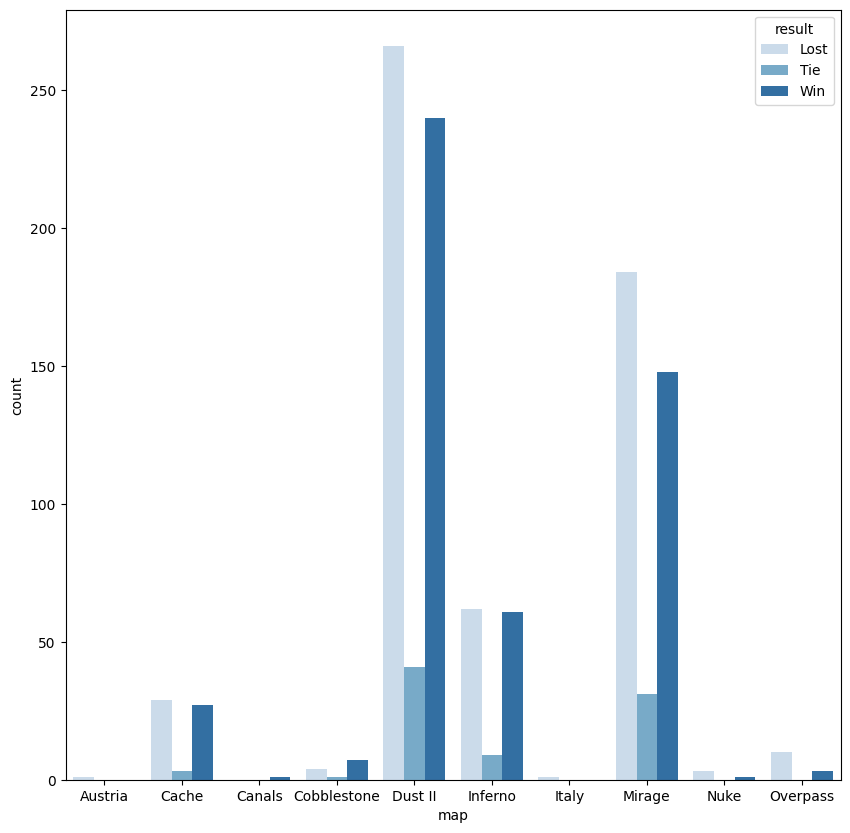

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.countplot(data=data, x="map", hue="result", palette="Blues");
plt.tight_layout

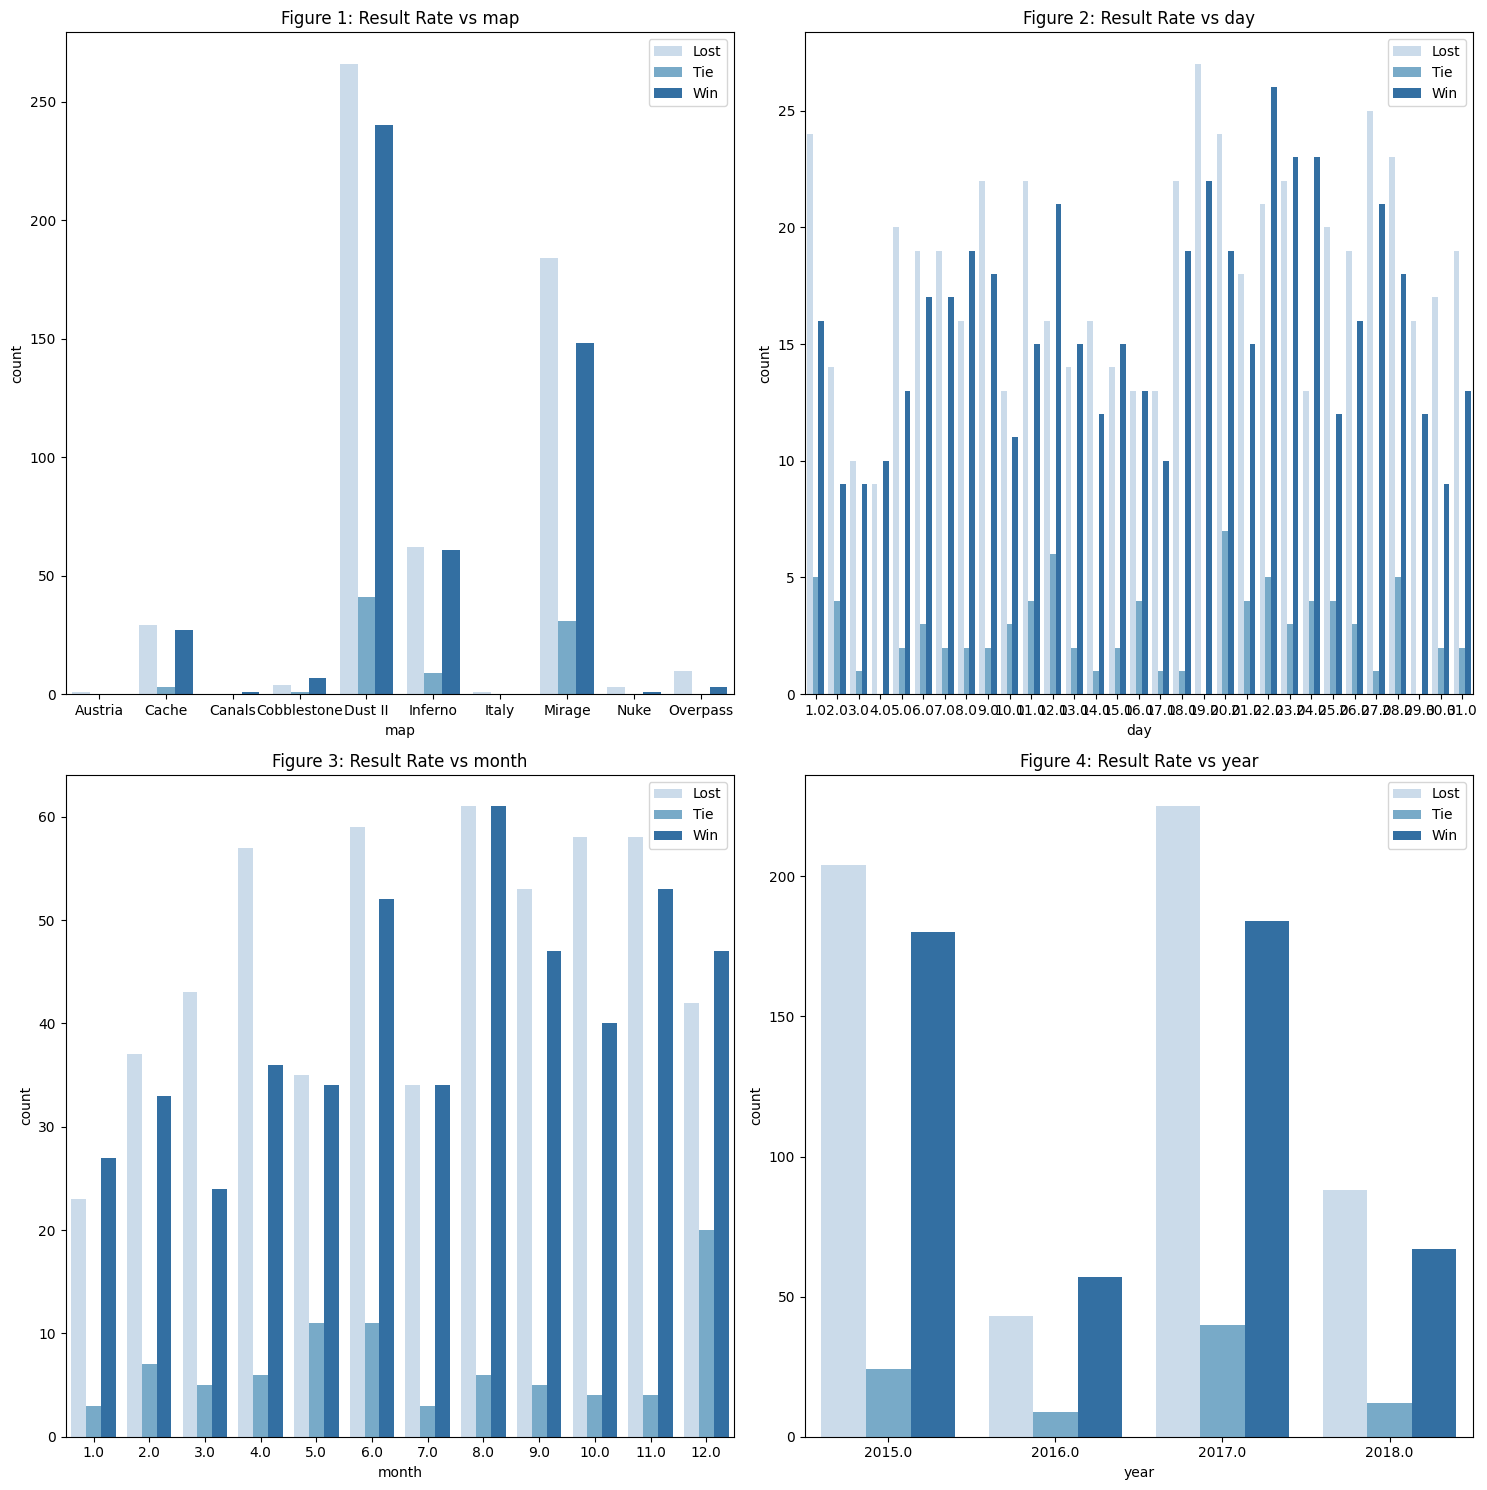

In [9]:
cols = ["map", "day", "month", "year"]

n_rows = 2
n_cols = 2
fig, ax = plt.subplots(n_rows, n_cols, figsize = (15, 15))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data = data, x = cols[i], hue = 'result', palette = 'Blues', ax = ax_i);
            ax_i.set_title(f'Figure {i + 1}: Result Rate vs {cols[i]}')
            ax_i.legend(title = '', loc = 'upper right')

# ax.flat[-1].set_visible(False) # Remove the last subplot
plt.tight_layout()
plt.show()

#### **3.2 EDA for Numerical Feature**

* Numerical Features: `wait_time_s` ,`match_time_s`, `ping`, `kills` ,`assists`, `deaths`, `mvps`, `hs_percent`, `point`

**wait_time_s**

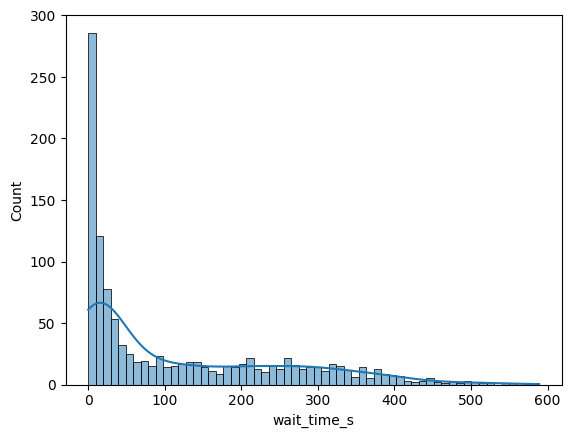

In [12]:
sns.histplot(data=data, x="wait_time_s", bins=60, kde=True);

In [11]:
data["wait_time_s"].describe()

count    1133.000000
mean      118.533098
std       134.129684
min         0.000000
25%         9.000000
50%        48.000000
75%       213.000000
max       589.000000
Name: wait_time_s, dtype: float64

In [13]:
data["match_time_s"].describe()

count    1133.000000
mean     2291.438658
std       474.524327
min       630.000000
25%      1942.000000
50%      2311.000000
75%      2648.000000
max      3603.000000
Name: match_time_s, dtype: float64

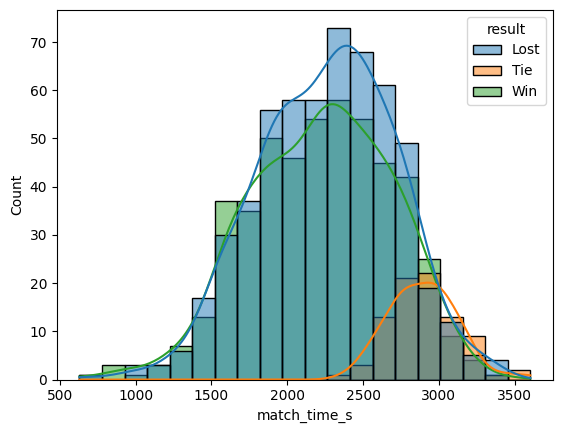

In [21]:
sns.histplot(data=data, x="match_time_s", hue="result", bins=20, kde=True);

Nhận xét:
* Thời gian chơi trung bình trong khoảng 30 đến 40 phút
* Phân bố gần theo phân phối chuẩn
* Các trận đấu hòa có xu hướng xuất hiện tại những trận đấu có thời gian thi đấu lớn (từ khoảng 2500 đến 3500 giây)

In [22]:
data["ping"].describe()

count    1133.000000
mean       72.494263
std        65.995966
min         0.000000
25%        31.000000
50%        76.000000
75%        92.000000
max       724.000000
Name: ping, dtype: float64

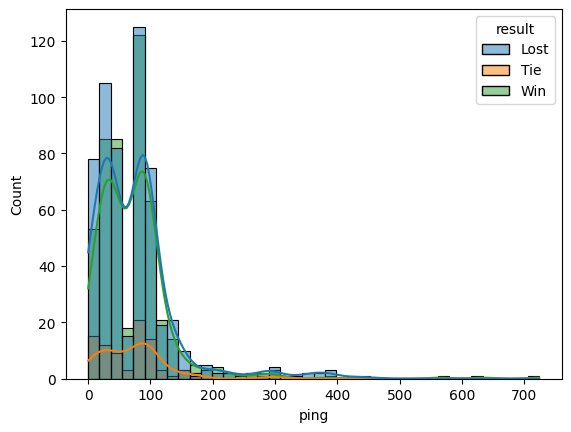

In [28]:
sns.histplot(data=data, x="ping",hue="result", bins=40, kde=True);

In [29]:
data["kills"].describe()

count    1133.000000
mean       14.706090
std         5.948775
min         0.000000
25%        11.000000
50%        14.000000
75%        18.000000
max        36.000000
Name: kills, dtype: float64

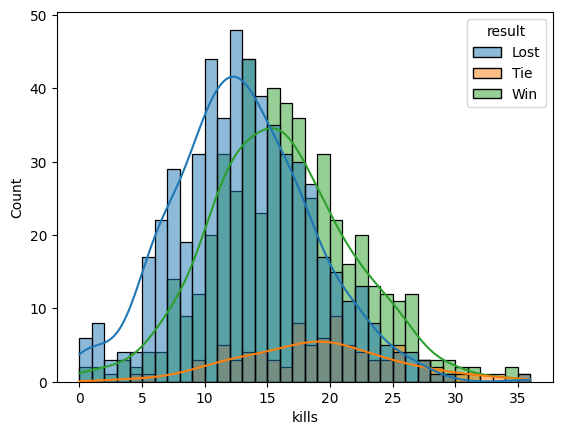

In [31]:
sns.histplot(data=data, x="kills", hue="result", bins = 36, kde=True);

Nhận xét: Tỉ lệ kill càng cao thì tỉ lệ chiến thắng càng cao

In [32]:
data["assists"].describe()

count    1133.000000
mean        4.158870
std         2.363482
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        14.000000
Name: assists, dtype: float64

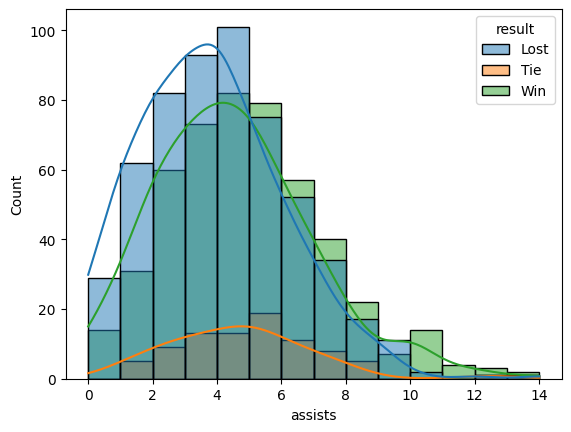

In [34]:
sns.histplot(data=data, x="assists", hue="result", bins=14, kde=True);

Nhận xét:
* Tỉ lệ assist càng cao thì tỉ lệ chiến thắng càng cao

In [35]:
data["deaths"].describe()

count    1133.000000
mean       17.034422
std         4.792483
min         0.000000
25%        14.000000
50%        18.000000
75%        21.000000
max        27.000000
Name: deaths, dtype: float64

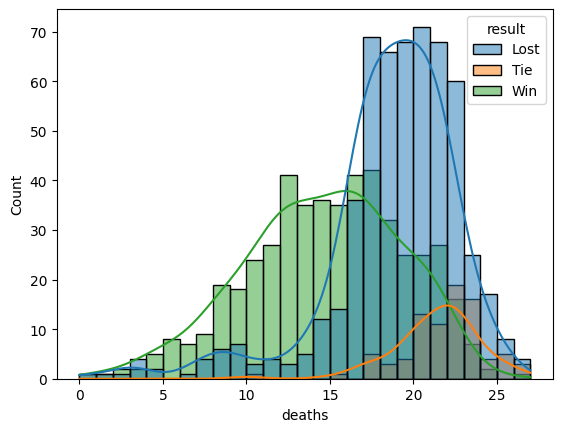

In [40]:
sns.histplot(data=data, x="deaths", hue="result", bins=27, kde=True);

Nhận xét:
* Tỉ lệ deaths thấp dẫn tới tỉ lệ win cao
* Tỉ lệ deaths cao dẫn tới tỉ lệ lost hoặc tie cao

In [37]:
data["mvps"].describe()

count    1133.000000
mean        1.825243
std         1.487699
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: mvps, dtype: float64

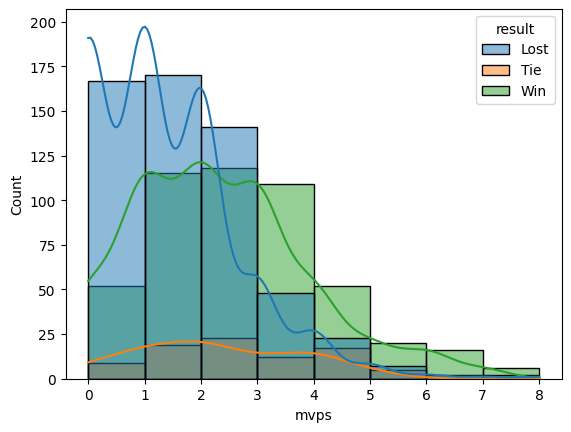

In [39]:
sns.histplot(data=data, x="mvps", hue="result", bins=8, kde=True);

Số trận mvps càng lớn thì tỉ lệ thắng càng cao

In [41]:
data["hs_percent"].describe()

count    1133.000000
mean       24.902030
std        13.672214
min         0.000000
25%        16.000000
50%        23.000000
75%        33.000000
max       100.000000
Name: hs_percent, dtype: float64

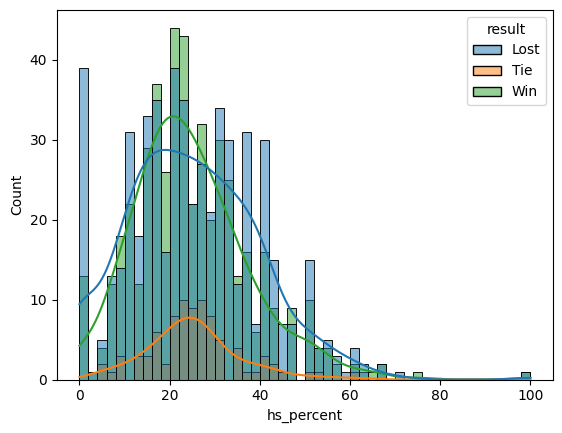

In [42]:
sns.histplot(data=data, x="hs_percent", hue="result", bins=50, kde=True);

In [43]:
data["points"].describe()

count    1133.000000
mean       39.217123
std        14.898022
min         0.000000
25%        29.000000
50%        39.000000
75%        49.000000
max        89.000000
Name: points, dtype: float64

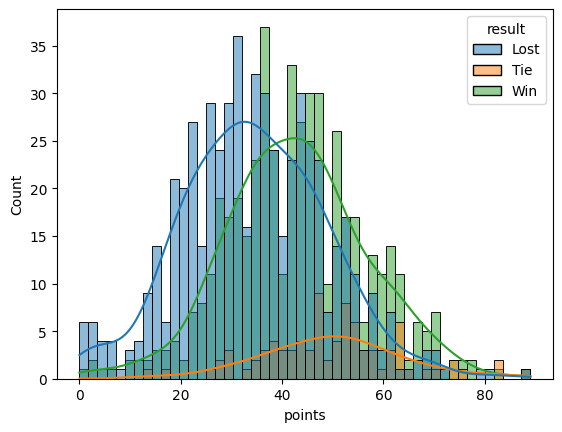

In [44]:
sns.histplot(data=data, x="points", hue="result", bins=50, kde=True);

Điểm số càng cao thì tỉ lệ thắng càng cao